In [1]:
#pip install pydicom
#pip uninstall -y enum34
#pip install labelme==3.16.7
import cv2
import json
import labelme
import os
import PIL
import shutil
import sys
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from labelme import utils
from pydicom import dcmread
from PIL import Image

In [44]:
json_file_name = 'sarcopenia_data/SARCOPANIA0010_1.json'
n_classes = 12
label_name_to_value = {}
json_data = json.load(open(json_file_name))
value_to_label_name = ['0. background' for _ in range(n_classes)]

#print(json_data["shapes"])
for shape in json_data["shapes"]:
    label_name = shape["label"]
    #label_name_to_value[label_name] = int(int(label_name.split('.')[0])*255/11)
    number = int(int(label_name.split('.')[0]))
    label_name_to_value[label_name] = number
    value_to_label_name[number] = label_name
    
print(label_name_to_value)
print(value_to_label_name)
with open('classes.txt', 'w') as f:
    for label in value_to_label_name:
        f.write("%s\n" % label)

{'5. Rt eretor spinae muscle': 5, '8. Lt trans abd,int and ext obl': 8, '9. Rt rectus abdominus muscle': 9, '2. Lt psoas major mucle': 2, '1. Rt psoas major mucle': 1, '3. Rt quardratus lumborum muscle': 3, '4. Lt quardratus lumborum muscle': 4, '6. Lt eretor spinae muscle': 6, '7. Rt trans abd,int and ext obl': 7, '10. Lt rectus abdominus muscle': 10, '11.L3 Vertebral body': 11}
['0. background', '1. Rt psoas major mucle', '2. Lt psoas major mucle', '3. Rt quardratus lumborum muscle', '4. Lt quardratus lumborum muscle', '5. Rt eretor spinae muscle', '6. Lt eretor spinae muscle', '7. Rt trans abd,int and ext obl', '8. Lt trans abd,int and ext obl', '9. Rt rectus abdominus muscle', '10. Lt rectus abdominus muscle', '11.L3 Vertebral body']


In [ ]:
file_list = glob('sarcopenia_data/*.dcm')
folder_list = ['train', 'valid', 'test']
ratio = [8, 1, 1]

for folder in folder_list:
    folder_path = os.path.join('sarcopenia_data', folder)
    if os.path.exists(folder_path):
        if os.path.isdir(folder_path):
            shutil.rmtree(folder_path)
    os.mkdir(folder_path)
    print(f'create folder {folder_path}')


In [148]:
for i, dcm_file_name in enumerate(glob('sarcopenia_data/*.dcm')):
    ds = dcmread(dcm_file_name)
    img = ds.pixel_array
    json_file_name = dcm_file_name.split('.')[0] + '_1.json'
    json_data = json.load(open(json_file_name))
    
    #img = utils.img_b64_to_array(json_data['imageData'])
    label = utils.shapes_to_label(img.shape, json_data['shapes'], label_name_to_value)
    #print(label)
    #captions = ['%d: %s' % (l, name) for l, name in enumerate(lbl_names)]
    gt_img = utils.draw_label(label, ds.pixel_array)

    folder = 'train'
    if i > len(file_list)*sum(ratio[:2])/sum(ratio):
        folder = 'test'
    elif i > len(file_list)*sum(ratio[:1])/sum(ratio):
        folder = 'valid'
    folder = 'all'
    
    #img_file_name = os.path.join(dcm_file_name.split('/')[0], folder, dcm_file_name.split('/')[-1].split('.')[0]+'.png')
    img_file_name = os.path.join(dcm_file_name.split('/')[0], folder, dcm_file_name.split('/')[-1].split('.')[0]+'.dcm')
    print(img_file_name)
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.imsave(img_file_name, img)
    shutil.copyfile(dcm_file_name, img_file_name)
    gt_file_name = os.path.join(dcm_file_name.split('/')[0], folder, dcm_file_name.split('/')[-1].split('.')[0]+'_gt.png')
    #plt.imshow(gt_img, cmap=plt.cm.gray)
    #print(label)
    #plt.imsave(gt_file_name, label)
    cv2.imwrite(gt_file_name, label)
    
    #print(label)
    #plt.show()
    
    #break


sarcopenia_data/all/SARCOPANIA0020.dcm
sarcopenia_data/all/SARCOPANIA0060.dcm
sarcopenia_data/all/SARCOPANIA0040.dcm
sarcopenia_data/all/SARCOPANIA0090.dcm
sarcopenia_data/all/SARCOPANIA0100.dcm
sarcopenia_data/all/SARCOPANIA0110.dcm
sarcopenia_data/all/SARCOPANIA0050.dcm
sarcopenia_data/all/SARCOPANIA0130.dcm
sarcopenia_data/all/SARCOPANIA0140.dcm
sarcopenia_data/all/SARCOPANIA0080.dcm
sarcopenia_data/all/SARCOPANIA0120.dcm
sarcopenia_data/all/SARCOPANIA0150.dcm
sarcopenia_data/all/SARCOPANIA0170.dcm
sarcopenia_data/all/SARCOPANIA0200.dcm
sarcopenia_data/all/SARCOPANIA0030.dcm
sarcopenia_data/all/SARCOPANIA0190.dcm
sarcopenia_data/all/SARCOPANIA0070.dcm
sarcopenia_data/all/SARCOPANIA0210.dcm
sarcopenia_data/all/SARCOPANIA0250.dcm
sarcopenia_data/all/SARCOPANIA0230.dcm
sarcopenia_data/all/SARCOPANIA0260.dcm
sarcopenia_data/all/SARCOPANIA0280.dcm
sarcopenia_data/all/SARCOPANIA0330.dcm
sarcopenia_data/all/SARCOPANIA0240.dcm
sarcopenia_data/all/SARCOPANIA0300.dcm
sarcopenia_data/all/SARCO

In [9]:
ds = dcmread('sarcopenia_data/SARCOPANIA0010.dcm')
img = ds.pixel_array
print(img.shape)
plt.imsave('SARCOPANIA0010_1.png', img, cmap=plt.cm.gray)

(512, 512)


In [8]:
a='./../sarcopenia_data/train/SARCOPANIA0190.png'
a.split('.png')[0]

'./../sarcopenia_data/train/SARCOPANIA0190'

In [16]:
from PIL import Image
GT = Image.open('sarcopenia_data/train/SARCOPANIA0020_gt.png')
print(GT.size)
GT = np.array(GT)
print(GT.any())
index = np.nonzero(GT)
print(len(index[0]))
print(GT[index])

(512, 512)
True
29378
[9 9 9 ... 6 6 6]
(12,)


In [ ]:
import torch
from Image_Segmentation.network import U_Net, AttU_Net
from Image_Segmentation.evaluation import get_DC

net = AttU_Net(img_ch=3, output_ch=12).to('cuda')
net.load_state_dict(torch.load('Image_Segmentation/models/AttU_Net-f4-199-0.863.pkl'))
            
net.train(False)
#net.eval()

Dice score 0.9784464141679214
Dice score 0.9693461376574026
Dice score 0.9722895660156377
Dice score 0.9789975513677969
Dice score 0.9786086245544668
Dice score 0.9723681546019853
Dice score 0.9815902604794033
Dice score 0.9851297349859531
Dice score 0.9856006721322393
Dice score 0.983946975502775
Dice score 0.981976978322021
Dice score 0.9768822565282947
Dice score 0.9786837013867831
Dice score 0.9835504882862747
Dice score 0.9764226695240491
Dice score 0.98151187377201
Dice score 0.9862612165014708
Dice score 0.9718833924807713
Dice score 0.9791809043097033
Dice score 0.9736837577900747
Dice score 0.9847517865995629
Dice score 0.9792491441448558
Dice score 0.9850412296911352
Dice score 0.9564373978505926
Dice score 0.9814371760946191
Dice score 0.9800838974873158
Dice score 0.9788008217457765
Dice score 0.9836863314280023
Dice score 0.9790633671888819
Dice score 0.9786397819228045
Dice score 0.9718877652475945
Dice score 0.974233077260697
Dice score 0.9840786360959713
Dice score 0.95

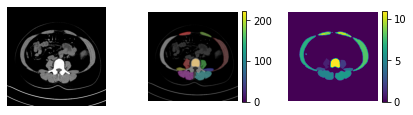

In [70]:
import json
import torch.nn.functional as F
from glob import glob
from torchvision import transforms as T

import logging
logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(levelname)s %(message)s',
                    datefmt='%Y-%m-%d %H:%M',
                    handlers=[logging.FileHandler('my.log', 'w', 'utf-8'), ])
 

count = 0
for file in glob('sarcopenia_data/train_valid/*.dcm'):
#for file in glob('sarcopenia_data/valid/*_gt.png'):
#for file in glob('sarcopenia_data/test/*_gt.png'):
    image_name = file.split('.')[0]
    
    image_path = image_name+'.dcm'
    #gt_path = image_name+'_gt.png'

    ds = dcmread(image_path)
    image = ds.pixel_array
    image_h, image_w = image.shape
    image = image.astype('float64')
    intercept = ds.RescaleIntercept
    wc = 50
    ww = 250
    UL = wc + ww/2
    LL = wc - ww/2
    """
    try:
        wc = ds.WindowCenter[0]
        ww = ds.WindowWidth[0]
        UL = wc + ww/2
        LL = wc - ww/2
    except:
        wc = ds.WindowCenter
        ww = ds.WindowWidth
        UL = wc + ww/2
        LL = wc - ww/2
    """
    #print(f'window param {wc}, {ww}')
    slope = ds.RescaleSlope
    image -= (-intercept+LL)
    image[image<0] = 0
    image[image>(UL-LL)] = UL-LL
    image *= 255.0/image.max()
    image = image.astype('uint8')
    image = Image.fromarray(image)
    image_src = image.convert('RGB')
    
    #image_gt = Image.open(gt_path)

    Transform = []
    Transform.append(T.ToTensor())
    Transform = T.Compose(Transform)

    image = Transform(image_src)

    Norm_ = T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))   
    image = Norm_(image)

    image = image.unsqueeze(0).to('cuda')

    pred = torch.sigmoid(net(image))
    pred = pred.squeeze(0).detach().cpu()
    
    GT_path = image_path.split('.dcm')[0] + '_1.json'
    #GT = Image.open(GT_path)
    json_data = json.load(open(GT_path))
    gt_label = utils.shapes_to_label(np.array(image_src).shape, json_data['shapes'], label_name_to_value)
    gt_img = utils.draw_label(gt_label, np.array(image_src))

    gt_label = torch.tensor(np.array(gt_label), dtype=torch.int64)
    gt_label = torch.nn.functional.one_hot(gt_label, n_classes).to(torch.float).permute(2,0,1)
    print(f'Dice score {get_DC(pred, gt_label)}')
    pred = np.argmax(pred, axis=0)
    
    shapes = []
    for i in range(1, n_classes):
        mask = pred[pred==i]
        layer = np.array(pred==i, np.uint8)*255 
        contours, _ = cv2.findContours(layer, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            contour = cv2.approxPolyDP(contour, 3, True).reshape(-1, 2).tolist()
            if len(contour) < 3: continue
            shape_data = {"label": value_to_label_name[i],
                          "points": contour,
                          "group_id": None,
                          "shape_type": "polygon",
                          "flags": {},
                         }
            shapes.append(shape_data)
        #plt.show()
        
    json_data = {"version": "4.5.6",
                 "flag": {},
                 "imagePath": image_name.split('/')[-1]+'.png',
                 "imageData": None,
                 "imageHeight": image_h,
                 "imageWidth": image_w,
                 "shapes": shapes,
                }
    with open(image_name+'.json', 'w') as outfile:
        json.dump(json_data, outfile)
        
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.tight_layout()
    #print(image.shape)
    im1 = ax1.imshow(np.array(image_src))
    #print(image_src.size)
    #image_src.save(image_name+'.png')
    ax1.set_axis_off()

    im2 = ax2.imshow(gt_img)
    fig.colorbar(im2, ax=ax2, fraction=0.046)
    ax2.set_axis_off()

    im3 = ax3.imshow(pred)
    ax3.set_axis_off()
    fig.colorbar(im3, ax=ax3, fraction=0.046)
    plt.show()
    #print(f'Dice score {get_DC(pred, T.ToTensor()(image_gt))}')
    #break
    #count += 1
    #if count > 5:
    #    break

In [124]:
n = 5
indices = torch.randint(0, n, size=(4,7))
one_hot = torch.nn.functional.one_hot(indices, n) # size=(4,7,n)
print(indices)
print(one_hot.shape)
print(np.argmax(one_hot, axis=2))

tensor([[3, 3, 2, 4, 0, 1, 4],
        [4, 4, 4, 1, 1, 3, 1],
        [3, 3, 1, 1, 4, 3, 4],
        [2, 3, 4, 3, 4, 2, 3]])
torch.Size([4, 7, 5])
tensor([[3, 3, 2, 4, 0, 1, 4],
        [4, 4, 4, 1, 1, 3, 1],
        [3, 3, 1, 1, 4, 3, 4],
        [2, 3, 4, 3, 4, 2, 3]])
